In [50]:
# import all necessary library
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import io
import pandas as pd
import numpy as np
#import osmnx as ox

In [51]:
# Dictionary mapping abbreviations to full county names
county_full_names = {
    'ALA': 'Alameda',
    'ALP': 'Alpine',
    'AMA': 'Amador',
    'BUT': 'Butte',
    'CAL': 'Calaveras',
    'COL': 'Colusa',
    'CC': 'Contra Costa',
    'DN': 'Del Norte',
    'ED': 'El Dorado',
    'FRE': 'Fresno',
    'GLE': 'Glenn',
    'HUM': 'Humboldt',
    'IMP': 'Imperial',
    'INY': 'Inyo',
    'KER': 'Kern',
    'KIN': 'Kings',
    'LAK': 'Lake',
    'LAS': 'Lassen',
    'LA': 'Los Angeles',
    'MAD': 'Madera',
    'MRN': 'Marin',
    'MPA': 'Mariposa',
    'MEN': 'Mendocino',
    'MER': 'Merced',
    'MOD': 'Modoc',
    'MNO': 'Mono',
    'MON': 'Monterey',
    'NAP': 'Napa',
    'NEV': 'Nevada',
    'ORA': 'Orange',
    'PLA': 'Placer',
    'PLU': 'Plumas',
    'RIV': 'Riverside',
    'SAC': 'Sacramento',
    'SBT': 'San Benito',
    'SBD': 'San Bernardino',
    'SD': 'San Diego',
    'SF': 'San Francisco',
    'SJ': 'San Joaquin',
    'SLO': 'San Luis Obispo',
    'SM': 'San Mateo',
    'SB': 'Santa Barbara',
    'SCL': 'Santa Clara',
    'SCR': 'Santa Cruz',
    'SHA': 'Shasta',
    'SIE': 'Sierra',
    'SIS': 'Siskiyou',
    'SOL': 'Solano',
    'SON': 'Sonoma',
    'STA': 'Stanislaus',
    'SUT': 'Sutter',
    'TEH': 'Tehama',
    'TRI': 'Trinity',
    'TUL': 'Tulare',
    'TUO': 'Tuolumne',
    'VEN': 'Ventura',
    'YOL': 'Yolo',
    'YUB': 'Yuba'
}

In [52]:
# read state highway system
shs=gpd.read_file('/mnt/mdp/Jupyter/Dev_Mintu/PeMS_Coverage/SHN_Lines.geojson')
shs_proj=shs.to_crs("EPSG:3310")
shs_proj['County'] = shs_proj['County'].map(county_full_names)
shs_proj['County']=shs_proj['County'].str.lower()
shs_proj.head()

,OBJECTID,Route,RteSuffix,RouteS,PMRouteID,County,District,PMPrefix,bPM,ePM,PMSuffix,bPMc,ePMc,bOdometer,eOdometer,AlignCode,RouteType,Direction,Shape_Length,geometry
0,1,80,,80,PLA080.R.L,placer,3,R,55.008,56.078,,R55.008,R56.078,156.512,157.582,Left,Interstate,WB,0.018392,"MULTILINESTRING ((-58329.675 142277.358, -5832..."
1,2,80,,80,PLA080...L,placer,3,,52.947,55.008,,52.947,55.008,154.451,156.512,Left,Interstate,WB,0.036842,"MULTILINESTRING ((-61268.303 140813.005, -6126..."
2,3,80,,80,PLA080..LL,placer,3,,49.180,52.947,L,49.18L,52.947L,150.684,154.451,Left Independent,Interstate,WB,0.060406,"MULTILINESTRING ((-64901.249 136251.945, -6490..."
3,4,80,,80,PLA080...L,placer,3,,26.920,49.180,,26.92,49.18,128.424,150.684,Left,Interstate,WB,0.362514,"MULTILINESTRING ((-85592.441 111385.108, -8558..."
4,5,80,,80,PLA080...L,placer,3,,0.000,18.822,,0.0,18.822,101.519,120.341,Left,Interstate,WB,0.310451,"MULTILINESTRING ((-112373.646 79179.862, -1122..."


In [53]:
# project the SHS
shs_proj_link=shs.to_crs("EPSG:3310")
shs_proj_link['Segment_length_mile']=shs_proj_link['geometry'].length*0.000621371
shs_proj_link.head()

,OBJECTID,Route,RteSuffix,RouteS,PMRouteID,County,District,PMPrefix,bPM,ePM,...,bPMc,ePMc,bOdometer,eOdometer,AlignCode,RouteType,Direction,Shape_Length,geometry,Segment_length_mile
0,1,80,,80,PLA080.R.L,PLA,3,R,55.008,56.078,...,R55.008,R56.078,156.512,157.582,Left,Interstate,WB,0.018392,"MULTILINESTRING ((-58329.675 142277.358, -5832...",1.053197
1,2,80,,80,PLA080...L,PLA,3,,52.947,55.008,...,52.947,55.008,154.451,156.512,Left,Interstate,WB,0.036842,"MULTILINESTRING ((-61268.303 140813.005, -6126...",2.067330
2,3,80,,80,PLA080..LL,PLA,3,,49.180,52.947,...,49.18L,52.947L,150.684,154.451,Left Independent,Interstate,WB,0.060406,"MULTILINESTRING ((-64901.249 136251.945, -6490...",3.723561
3,4,80,,80,PLA080...L,PLA,3,,26.920,49.180,...,26.92,49.18,128.424,150.684,Left,Interstate,WB,0.362514,"MULTILINESTRING ((-85592.441 111385.108, -8558...",22.255459
4,5,80,,80,PLA080...L,PLA,3,,0.000,18.822,...,0.0,18.822,101.519,120.341,Left,Interstate,WB,0.310451,"MULTILINESTRING ((-112373.646 79179.862, -1122...",18.833949


In [54]:
# import PeMS meta data
pems_meta_data=pd.read_csv('/mnt/mdp/Jupyter/Dev_Mintu/PeMS_Coverage/detector_meta_data.csv')
pems_meta_data=pems_meta_data.loc[pems_meta_data['STATUS']==1]
pems_meta_data=pems_meta_data.drop(['GEOMETRY'],axis=1)
geometry = [Point(xy) for xy in zip(pems_meta_data['LONGITUDE'], pems_meta_data['LATITUDE'])]
pems_gdf = gpd.GeoDataFrame(pems_meta_data, geometry=geometry)

# Set the CRS to EPSG:4326 (WGS 84)
pems_gdf.set_crs(epsg=4326, inplace=True)
pems_gdf_proj=pems_gdf.to_crs("EPSG:3310")
pems_gdf_proj = pems_gdf_proj[(pems_gdf_proj['DETECTOR_TYPE'] == 'ML') | (pems_gdf_proj['DETECTOR_TYPE'] == 'HV')]
# Replace direction codes in the 'Direction' column
pems_gdf_proj['DIRECTION'] = pems_gdf_proj['DIRECTION'].replace({
    'N': 'NB',
    'S': 'SB',
    'W': 'WB',
    'E': 'EB'
})
pems_gdf_proj.head()

,DETECTOR_ID,STATION_ID,STATUS,LANE,DETECTOR_TYPE,STATION_TYPE,DISTRICT,CITY,FREEWAY,DIRECTION,LENGTH,STATE_POSTMILE,ABSOLUTE_POSTMILE,LATITUDE,LONGITUDE,PHYSICAL_LANES,COUNTY,geometry
0,818494,818606,1,2,ML,ML,8,NaN,215,NB,0.400,36.5,28.167,33.917895,-117.287828,3,riverside,POINT (250789.74 -451686.444)
1,411445,402133,1,1,ML,ML,4,70098.0,101,NB,0.275,20.87,489.572,38.447225,-122.724799,3,sonoma,POINT (-237497.887 51309.355)
2,438210,407374,1,1,ML,ML,4,49670.0,85,SB,0.495,R22.92,23.096,37.395123,-122.068612,3,santa clara,POINT (-182865.752 -67065.933)
3,763328,763325,1,4,ML,ML,7,44000.0,10,WB,0.290,R6.46,4.305,34.031891,-118.416029,4,los angeles,POINT (146268.916 -441407.596)
4,440141,408911,1,4,ML,ML,4,NaN,880,SB,0.570,.54,0.540,37.325153,-121.940859,4,santa clara,POINT (-171733.204 -75081.137)


In [55]:
pems_gdf_proj.shape

(33609, 18)

In [56]:
# create a 50 ft buffer around the state highway system
buffer_size=50/3.28
shs_proj['geometry'] = shs_proj.buffer(buffer_size)
shs_proj.head()

,OBJECTID,Route,RteSuffix,RouteS,PMRouteID,County,District,PMPrefix,bPM,ePM,PMSuffix,bPMc,ePMc,bOdometer,eOdometer,AlignCode,RouteType,Direction,Shape_Length,geometry
0,1,80,,80,PLA080.R.L,placer,3,R,55.008,56.078,,R55.008,R56.078,156.512,157.582,Left,Interstate,WB,0.018392,"POLYGON ((-58335.256 142292.214, -58295.79 142..."
1,2,80,,80,PLA080...L,placer,3,,52.947,55.008,,52.947,55.008,154.451,156.512,Left,Interstate,WB,0.036842,"POLYGON ((-61273.631 140827.602, -61273.436 14..."
2,3,80,,80,PLA080..LL,placer,3,,49.180,52.947,L,49.18L,52.947L,150.684,154.451,Left Independent,Interstate,WB,0.060406,"POLYGON ((-64915.512 136289.622, -64915.121 13..."
3,4,80,,80,PLA080...L,placer,3,,26.920,49.180,,26.92,49.18,128.424,150.684,Left,Interstate,WB,0.362514,"POLYGON ((-85596.125 111417.919, -85595.597 11..."
4,5,80,,80,PLA080...L,placer,3,,0.000,18.822,,0.0,18.822,101.519,120.341,Left,Interstate,WB,0.310451,"POLYGON ((-112265.832 79320.77, -112235.334 79..."


In [57]:
#Now do the spatial join with SHS data
shs_meta_data_joined = gpd.sjoin(pems_gdf_proj, shs_proj, predicate="within", how="inner")
# drop duplicates station id ue to buffer head overlap
shs_meta_data_joined=shs_meta_data_joined.drop_duplicates(['STATION_ID','DETECTOR_ID','STATION_TYPE','DETECTOR_TYPE','LANE','FREEWAY','DIRECTION','CITY', 'COUNTY','DISTRICT','ABSOLUTE_POSTMILE','PHYSICAL_LANES','STATE_POSTMILE'], keep='first')
#shs_meta_data_joined['COUNTY']=shs_meta_data_joined['COUNTY'].str.lower()
shs_meta_data_joined.head()

,DETECTOR_ID,STATION_ID,STATUS,LANE,DETECTOR_TYPE,STATION_TYPE,DISTRICT,CITY,FREEWAY,DIRECTION,...,ePM,PMSuffix,bPMc,ePMc,bOdometer,eOdometer,AlignCode,RouteType,Direction,Shape_Length
0,818494,818606,1,2,ML,ML,8,NaN,215,NB,...,38.930,,R27.525,R38.93,19.192,30.597,Right,Interstate,NB,0.171117
1,411445,402133,1,1,ML,ML,4,70098.0,101,NB,...,22.131,,1.673,22.131,467.839,488.297,Right,US,NB,0.315944
2,438210,407374,1,1,ML,ML,4,49670.0,85,SB,...,24.059,,R10.231,R24.059,10.407,24.235,Left,State,SB,0.218008
3,763328,763325,1,4,ML,ML,7,44000.0,10,WB,...,14.089,,R2.155,R14.089,0.000,11.934,Left,Interstate,WB,0.205444
4,440141,408911,1,4,ML,ML,4,NaN,880,SB,...,10.502,,0.0,10.502,0.000,10.502,Right,Interstate,NB,0.158565


In [58]:
# Now filter out more based on route, county, district, and PM prefix to avoid any mis match
def qc(shs_proj, pems_gdf_proj):
    # Check if the specified columns match between the two dataframes
    if (shs_proj['Route'] == pems_gdf_proj['FREEWAY'] and
        shs_proj['Direction'] == pems_gdf_proj['DIRECTION'] and
        #shs_proj['District'] == pems_gdf_proj['DISTRICT'] and
        shs_proj['County'] == pems_gdf_proj['COUNTY'] ): #and
        #shs_proj['pmprefix'] == aadt_proj['PM_PFX']): # and
        #shs_proj['pmsuffix'] == aadt_proj['PM_SFX']):
        return True
    else:
        return False

In [59]:
# Apply the QC function to each row of the GeoDataFrame
shs_meta_data_joined['Qualified'] = shs_meta_data_joined.apply(lambda row: qc(row, row), axis=1)
shs_meta_data_joined.head()

,DETECTOR_ID,STATION_ID,STATUS,LANE,DETECTOR_TYPE,STATION_TYPE,DISTRICT,CITY,FREEWAY,DIRECTION,...,PMSuffix,bPMc,ePMc,bOdometer,eOdometer,AlignCode,RouteType,Direction,Shape_Length,Qualified
0,818494,818606,1,2,ML,ML,8,NaN,215,NB,...,,R27.525,R38.93,19.192,30.597,Right,Interstate,NB,0.171117,True
1,411445,402133,1,1,ML,ML,4,70098.0,101,NB,...,,1.673,22.131,467.839,488.297,Right,US,NB,0.315944,True
2,438210,407374,1,1,ML,ML,4,49670.0,85,SB,...,,R10.231,R24.059,10.407,24.235,Left,State,SB,0.218008,True
3,763328,763325,1,4,ML,ML,7,44000.0,10,WB,...,,R2.155,R14.089,0.000,11.934,Left,Interstate,WB,0.205444,True
4,440141,408911,1,4,ML,ML,4,NaN,880,SB,...,,0.0,10.502,0.000,10.502,Right,Interstate,NB,0.158565,False


In [60]:
shs_meta_data_joined.groupby(['Qualified'])['Qualified'].count()

Qualified
False     1766
True     31014
Name: Qualified, dtype: int64

In [61]:
# Lets consider only qualified count
qualified_count_segment=shs_meta_data_joined.loc[shs_meta_data_joined['Qualified']==True]
qualified_count_segment=qualified_count_segment.drop(['geometry'],axis=1)
qualified_count_segment.head()

,DETECTOR_ID,STATION_ID,STATUS,LANE,DETECTOR_TYPE,STATION_TYPE,DISTRICT,CITY,FREEWAY,DIRECTION,...,PMSuffix,bPMc,ePMc,bOdometer,eOdometer,AlignCode,RouteType,Direction,Shape_Length,Qualified
0,818494,818606,1,2,ML,ML,8,NaN,215,NB,...,,R27.525,R38.93,19.192,30.597,Right,Interstate,NB,0.171117,True
1,411445,402133,1,1,ML,ML,4,70098.0,101,NB,...,,1.673,22.131,467.839,488.297,Right,US,NB,0.315944,True
2,438210,407374,1,1,ML,ML,4,49670.0,85,SB,...,,R10.231,R24.059,10.407,24.235,Left,State,SB,0.218008,True
3,763328,763325,1,4,ML,ML,7,44000.0,10,WB,...,,R2.155,R14.089,0.000,11.934,Left,Interstate,WB,0.205444,True
5,440454,409724,1,2,ML,ML,4,70098.0,101,SB,...,,22.138,38.268,488.062,504.192,Left,US,SB,0.256384,True


In [62]:
# Now bring the shs segment geometry with the process file
shs_link = shs_proj_link.loc[pd.notna(shs_proj_link['County'])]
shs_link=shs_link.drop(['Route', 'RteSuffix', 'RouteS', 'PMRouteID', 'County',
       'District', 'PMPrefix', 'bPM', 'ePM', 'PMSuffix', 'bPMc', 'ePMc',
       'bOdometer', 'eOdometer', 'AlignCode', 'RouteType', 'Direction',
       'Shape_Length'],axis=1)

shs_link.head()

,OBJECTID,geometry,Segment_length_mile
0,1,"MULTILINESTRING ((-58329.675 142277.358, -5832...",1.053197
1,2,"MULTILINESTRING ((-61268.303 140813.005, -6126...",2.067330
2,3,"MULTILINESTRING ((-64901.249 136251.945, -6490...",3.723561
3,4,"MULTILINESTRING ((-85592.441 111385.108, -8558...",22.255459
4,5,"MULTILINESTRING ((-112373.646 79179.862, -1122...",18.833949


In [63]:
# add the segment geometry of the segment
shs_pems_meta_joined2=pd.merge(shs_link,qualified_count_segment, on=['OBJECTID'], how='inner')
shs_pems_meta_joined2.head()

,OBJECTID,geometry,Segment_length_mile,DETECTOR_ID,STATION_ID,STATUS,LANE,DETECTOR_TYPE,STATION_TYPE,DISTRICT,...,PMSuffix,bPMc,ePMc,bOdometer,eOdometer,AlignCode,RouteType,Direction,Shape_Length,Qualified
0,1,"MULTILINESTRING ((-58329.675 142277.358, -5832...",1.053197,319439,319444,1,2,ML,ML,3,...,,R55.008,R56.078,156.512,157.582,Left,Interstate,WB,0.018392,True
1,1,"MULTILINESTRING ((-58329.675 142277.358, -5832...",1.053197,319438,319444,1,1,ML,ML,3,...,,R55.008,R56.078,156.512,157.582,Left,Interstate,WB,0.018392,True
2,4,"MULTILINESTRING ((-85592.441 111385.108, -8558...",22.255459,30470817,3047084,1,1,ML,ML,3,...,,26.92,49.18,128.424,150.684,Left,Interstate,WB,0.362514,True
3,4,"MULTILINESTRING ((-85592.441 111385.108, -8558...",22.255459,316258,316264,1,2,ML,ML,3,...,,26.92,49.18,128.424,150.684,Left,Interstate,WB,0.362514,True
4,4,"MULTILINESTRING ((-85592.441 111385.108, -8558...",22.255459,30470401,3047041,1,1,ML,ML,3,...,,26.92,49.18,128.424,150.684,Left,Interstate,WB,0.362514,True


In [64]:
# read addt for 2024 that is calculated based on 2023 data
aadt=pd.read_csv('2024_aadt.csv')
aadt1=aadt[['STATION_ID', 'STATION_TYPE','AADT_1']]
aadt1.rename(columns={'AADT_1':'AADT'},inplace=True)
# same station was located in two different counties, lets take a single average aadt
average_aadt = aadt1.groupby(['STATION_ID', 'STATION_TYPE'])['AADT'].mean().reset_index()
average_aadt['AADT_Thousands']=average_aadt['AADT']/1000
average_aadt.head()

/tmp/ipykernel_2098150/3713499218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aadt1.rename(columns={'AADT_1':'AADT'},inplace=True)


,STATION_ID,STATION_TYPE,AADT,AADT_Thousands
0,308511,ML,5146.972634,5.146973
1,308512,ML,10947.833333,10.947833
2,311903,ML,18420.606415,18.420606
3,312098,ML,11412.817396,11.412817
4,312132,ML,23461.254835,23.461255


In [65]:
# Join aadt data with shs
shs_pems_meta_joined3=pd.merge(shs_pems_meta_joined2,average_aadt, on=['STATION_ID'], how='outer')
shs_pems_meta_joined3 = shs_pems_meta_joined3.loc[
    shs_pems_meta_joined3['STATION_ID'].isin(shs_pems_meta_joined2['STATION_ID'])
]
shs_pems_meta_joined3.shape

(31015, 43)

In [66]:
# read detector status
detector_status=pd.read_csv('detector_yearly_status.csv')
detector_status1=detector_status[['STATION_ID','LANE','PCT_GOOD_DETECTOR']]# this is the percentage of good detector's day calculated in snowflake
detector_status1['Good_Detectors_Day_Ratio']=detector_status1['PCT_GOOD_DETECTOR']/100
# now sum the good detectors day ratio for all lanes
#detector_status2 = detector_status1.groupby(['STATION_ID'])['Good_Detectors_Day_Ratio'].sum().reset_index()
#detector_status2.rename(columns={'Good_Detectors_Day_Ratio':'Good_Detectors_Day_Ratio_sum'},inplace=True)
detector_status1.head()

/tmp/ipykernel_2098150/2273741414.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detector_status1['Good_Detectors_Day_Ratio']=detector_status1['PCT_GOOD_DETECTOR']/100


,STATION_ID,LANE,PCT_GOOD_DETECTOR,Good_Detectors_Day_Ratio
0,817213,4,89.0411,0.890411
1,716896,2,0.0000,0.000000
2,717568,2,0.0000,0.000000
3,716437,1,0.0000,0.000000
4,718251,3,53.3149,0.533149


In [67]:
shs_pems_meta_joined4=pd.merge(shs_pems_meta_joined3,detector_status1, on=['STATION_ID', 'LANE'], how='outer')

# Filter to match the shape of shs_pems_meta_joined2
shs_pems_meta_joined5 = shs_pems_meta_joined4.loc[
    shs_pems_meta_joined4['STATION_ID'].isin(shs_pems_meta_joined2['STATION_ID'])
]
shs_pems_meta_joined5.head()

,OBJECTID,geometry,Segment_length_mile,DETECTOR_ID,STATION_ID,STATUS,LANE,DETECTOR_TYPE,STATION_TYPE_x,DISTRICT,...,AlignCode,RouteType,Direction,Shape_Length,Qualified,STATION_TYPE_y,AADT,AADT_Thousands,PCT_GOOD_DETECTOR,Good_Detectors_Day_Ratio
0,1.0,"MULTILINESTRING ((-58329.675 142277.358, -5832...",1.053197,319439.0,319444,1.0,2.0,ML,ML,3.0,...,Left,Interstate,WB,0.018392,True,ML,14216.220188,14.216220,NaN,NaN
1,1.0,"MULTILINESTRING ((-58329.675 142277.358, -5832...",1.053197,319438.0,319444,1.0,1.0,ML,ML,3.0,...,Left,Interstate,WB,0.018392,True,ML,14216.220188,14.216220,NaN,NaN
2,4.0,"MULTILINESTRING ((-85592.441 111385.108, -8558...",22.255459,30470817.0,3047084,1.0,1.0,ML,ML,3.0,...,Left,Interstate,WB,0.362514,True,ML,13712.286230,13.712286,57.5342,0.575342
3,4.0,"MULTILINESTRING ((-85592.441 111385.108, -8558...",22.255459,30470818.0,3047084,1.0,2.0,ML,ML,3.0,...,Left,Interstate,WB,0.362514,True,ML,13712.286230,13.712286,60.2740,0.602740
4,4.0,"MULTILINESTRING ((-85592.441 111385.108, -8558...",22.255459,316258.0,316264,1.0,2.0,ML,ML,3.0,...,Left,Interstate,WB,0.362514,True,ML,14496.459961,14.496460,92.3288,0.923288


In [104]:
detector_list=shs_pems_meta_joined5[['OBJECTID','DETECTOR_ID','STATION_ID', 'STATUS', 'LANE','DETECTOR_TYPE','FREEWAY', 'DIRECTION','LATITUDE', 'LONGITUDE',]]

In [103]:
shs_pems_meta_joined5.columns

Index(['OBJECTID', 'geometry', 'Segment_length_mile', 'DETECTOR_ID',
       'STATION_ID', 'STATUS', 'LANE', 'DETECTOR_TYPE', 'STATION_TYPE_x',
       'DISTRICT', 'CITY', 'FREEWAY', 'DIRECTION', 'LENGTH', 'STATE_POSTMILE',
       'ABSOLUTE_POSTMILE', 'LATITUDE', 'LONGITUDE', 'PHYSICAL_LANES',
       'COUNTY', 'index_right', 'Route', 'RteSuffix', 'RouteS', 'PMRouteID',
       'County', 'District', 'PMPrefix', 'bPM', 'ePM', 'PMSuffix', 'bPMc',
       'ePMc', 'bOdometer', 'eOdometer', 'AlignCode', 'RouteType', 'Direction',
       'Shape_Length', 'Qualified', 'STATION_TYPE_y', 'AADT', 'AADT_Thousands',
       'PCT_GOOD_DETECTOR', 'Good_Detectors_Day_Ratio'],
      dtype='object')

In [68]:
shs_pems_meta_joined5.OBJECTID.nunique()

961

In [69]:
# Group by the specified columns and apply count for DETECTOR_ID and mean for Segment_length_mile
link_detetor_count = shs_pems_meta_joined5.groupby(
    ['OBJECTID', 'geometry', 'County',
       'District', 'Route','Direction']
).agg(
    DETECTOR_ID_count=('DETECTOR_ID', 'count'),        # Count of DETECTOR_ID
    Segment_length_mile=('Segment_length_mile', 'mean'),
    Segment_aadt_avg=('AADT_Thousands', 'mean'),
    # now we will sum of good detector day ratio over the segments
    Normalized_good_detector=('Good_Detectors_Day_Ratio', 'sum'),
    Physical_lane= ('PHYSICAL_LANES', 'mean')# Average of Segment_length_mile
).reset_index()
link_detetor_count['Segment_lane_length_mile']=link_detetor_count['Segment_length_mile']* link_detetor_count['Physical_lane']
# Display the result
link_detetor_count.head()

,OBJECTID,geometry,County,District,Route,Direction,DETECTOR_ID_count,Segment_length_mile,Segment_aadt_avg,Normalized_good_detector,Physical_lane,Segment_lane_length_mile
0,1.0,"MULTILINESTRING ((-58329.675 142277.358, -5832...",placer,3.0,80.0,WB,2,1.053197,14.216220,0.000000,2.000000,2.106395
1,4.0,"MULTILINESTRING ((-85592.441 111385.108, -8558...",placer,3.0,80.0,WB,14,22.255459,14.090643,10.726941,2.000000,44.510919
2,5.0,"MULTILINESTRING ((-112373.646 79179.862, -1122...",placer,3.0,80.0,WB,86,18.833949,50.165451,68.147608,3.093023,58.253842
3,6.0,"MULTILINESTRING ((-119090.325 71542.03, -11892...",sacramento,3.0,80.0,WB,80,6.320430,70.814973,54.855845,3.825000,24.175645
4,7.0,"MULTILINESTRING ((-120221.517 70820.356, -1200...",sacramento,3.0,80.0,WB,11,0.874807,44.952307,6.380289,3.000000,2.624420


In [70]:
#Aggregate on highway segments, find out the ratio of number of detectors over length of the segments. 
link_detetor_count['detector_desity_per_lane_mile']=link_detetor_count['DETECTOR_ID_count']/link_detetor_count['Segment_lane_length_mile']
#Aggregate on highway segments, find out the ratio of number of detectors over average AADTs along the segments. 
link_detetor_count['detector_desity_per_1000_AADT']=(link_detetor_count['DETECTOR_ID_count']/link_detetor_count['Physical_lane'])/(link_detetor_count['Segment_aadt_avg']/link_detetor_count['Physical_lane'])
#Aggregate on highway segments, find out the ratio of number of detectors over average AADT * length of the segments
link_detetor_count['DCI']=(link_detetor_count['Normalized_good_detector'])/(link_detetor_count['Segment_length_mile']*link_detetor_count['Segment_aadt_avg'])
link_detetor_count=link_detetor_count.loc[link_detetor_count['DCI']<1]
link_detetor_count.head()

,OBJECTID,geometry,County,District,Route,Direction,DETECTOR_ID_count,Segment_length_mile,Segment_aadt_avg,Normalized_good_detector,Physical_lane,Segment_lane_length_mile,detector_desity_per_lane_mile,detector_desity_per_1000_AADT,DCI
0,1.0,"MULTILINESTRING ((-58329.675 142277.358, -5832...",placer,3.0,80.0,WB,2,1.053197,14.216220,0.000000,2.000000,2.106395,0.949490,0.140684,0.000000
1,4.0,"MULTILINESTRING ((-85592.441 111385.108, -8558...",placer,3.0,80.0,WB,14,22.255459,14.090643,10.726941,2.000000,44.510919,0.314530,0.993567,0.034206
2,5.0,"MULTILINESTRING ((-112373.646 79179.862, -1122...",placer,3.0,80.0,WB,86,18.833949,50.165451,68.147608,3.093023,58.253842,1.476297,1.714327,0.072128
3,6.0,"MULTILINESTRING ((-119090.325 71542.03, -11892...",sacramento,3.0,80.0,WB,80,6.320430,70.814973,54.855845,3.825000,24.175645,3.309115,1.129705,0.122561
4,7.0,"MULTILINESTRING ((-120221.517 70820.356, -1200...",sacramento,3.0,80.0,WB,11,0.874807,44.952307,6.380289,3.000000,2.624420,4.191402,0.244704,0.162247


In [71]:
# Optionally, you can still apply Min-Max normalization to the log-transformed values
link_detetor_count['Normalized_DCI'] = (link_detetor_count['DCI'] - link_detetor_count['DCI'].min()) / (link_detetor_count['DCI'].max() - link_detetor_count['DCI'].min())

# Check the new stats
print(link_detetor_count['Normalized_DCI'].describe())

count    854.000000
mean       0.085966
std        0.101297
min        0.000000
25%        0.032829
50%        0.063290
75%        0.103948
max        1.000000
Name: Normalized_DCI, dtype: float64


In [72]:
# Find the links that do not have any PeMS counter installed
shs_without_pems = shs_proj_link[~shs_proj_link['OBJECTID'].isin(link_detetor_count['OBJECTID'])]
shs_without_pems=shs_without_pems[['OBJECTID', 'geometry', 'County',
       'District', 'Route','Direction','Segment_length_mile']]
shs_without_pems['DETECTOR_ID_count']=0
shs_without_pems['Segment_lane_length_mile']='unknown'
shs_without_pems['detector_desity_per_lane_mile']=0
shs_without_pems['detector_desity_per_1000_AADT']=0
shs_without_pems['DCI']=0
shs_without_pems['Normalized_good_detector']=0
shs_without_pems['Physical_lane']='unknown'
shs_without_pems['Normalized_DCI']=0
shs_without_pems['County'] = shs_without_pems['County'].map(county_full_names)
shs_without_pems['County']=shs_without_pems['County'].str.lower()
shs_without_pems.head()

,OBJECTID,geometry,County,District,Route,Direction,Segment_length_mile,DETECTOR_ID_count,Segment_lane_length_mile,detector_desity_per_lane_mile,detector_desity_per_1000_AADT,DCI,Normalized_good_detector,Physical_lane,Normalized_DCI
1,2,"MULTILINESTRING ((-61268.303 140813.005, -6126...",placer,3,80,WB,2.067330,0,unknown,0,0,0,0,unknown,0
2,3,"MULTILINESTRING ((-64901.249 136251.945, -6490...",placer,3,80,WB,3.723561,0,unknown,0,0,0,0,unknown,0
17,18,"MULTILINESTRING ((-206542.087 -19356.852, -206...",alameda,4,80,WB,1.654363,0,unknown,0,0,0,0,unknown,0
18,19,"MULTILINESTRING ((-211010.247 -23581.876, -210...",san francisco,4,80,WB,2.870094,0,unknown,0,0,0,0,unknown,0
19,20,"MULTILINESTRING ((277927.225 -456098.363, 2779...",riverside,8,79,NB,4.141658,0,unknown,0,0,0,0,unknown,0


In [73]:
# Now join two data frame that have link level density
shs_link_pems_sensor_density=pd.concat([link_detetor_count,shs_without_pems],axis=0)
shs_link_pems_sensor_density.head()

,OBJECTID,geometry,County,District,Route,Direction,DETECTOR_ID_count,Segment_length_mile,Segment_aadt_avg,Normalized_good_detector,Physical_lane,Segment_lane_length_mile,detector_desity_per_lane_mile,detector_desity_per_1000_AADT,DCI,Normalized_DCI
0,1.0,"MULTILINESTRING ((-58329.675 142277.358, -5832...",placer,3.0,80.0,WB,2,1.053197,14.216220,0.000000,2.0,2.106395,0.949490,0.140684,0.000000,0.000000
1,4.0,"MULTILINESTRING ((-85592.441 111385.108, -8558...",placer,3.0,80.0,WB,14,22.255459,14.090643,10.726941,2.0,44.510919,0.314530,0.993567,0.034206,0.039456
2,5.0,"MULTILINESTRING ((-112373.646 79179.862, -1122...",placer,3.0,80.0,WB,86,18.833949,50.165451,68.147608,3.093023,58.253842,1.476297,1.714327,0.072128,0.083197
3,6.0,"MULTILINESTRING ((-119090.325 71542.03, -11892...",sacramento,3.0,80.0,WB,80,6.320430,70.814973,54.855845,3.825,24.175645,3.309115,1.129705,0.122561,0.141369
4,7.0,"MULTILINESTRING ((-120221.517 70820.356, -1200...",sacramento,3.0,80.0,WB,11,0.874807,44.952307,6.380289,3.0,2.62442,4.191402,0.244704,0.162247,0.187146


In [74]:
# lets classify the segments
def seg_class(Normalized_Good_Detectors_per_mile,Segment_aadt_avg):
    if Normalized_Good_Detectors_per_mile <5 and Normalized_Good_Detectors_per_mile >0 and Segment_aadt_avg >60:
        return 'Segments With High Priority'
    elif Normalized_Good_Detectors_per_mile <5 and Normalized_Good_Detectors_per_mile >0 and Segment_aadt_avg  <=60:
        return 'Segments with Low Priority'
    elif Normalized_Good_Detectors_per_mile >= 5 :
        return 'Segments with Low Priority'
    else:
        return 'No Detectors'

In [75]:
shs_link_pems_sensor_density['Normalized_Good_Detectors_per_mile']= shs_link_pems_sensor_density['Normalized_good_detector']/shs_link_pems_sensor_density['Segment_length_mile']

In [93]:
# Apply the function to the DataFrame
shs_link_pems_sensor_density['Segment_Class'] = shs_link_pems_sensor_density.apply(
    lambda row: seg_class(row['Normalized_Good_Detectors_per_mile'], row['Segment_aadt_avg']), 
    axis=1
)

shs_link_pems_sensor_density['Normalized_DCI']=shs_link_pems_sensor_density['Normalized_DCI'].round(2)
shs_link_pems_sensor_density.head()

,OBJECTID,geometry,County,District,Route,Direction,DETECTOR_ID_count,Segment_length_mile,Segment_aadt_avg,Normalized_good_detector,Physical_lane,Segment_lane_length_mile,detector_desity_per_lane_mile,detector_desity_per_1000_AADT,DCI,Normalized_DCI,Normalized_Good_Detectors_per_mile,Segment_Class
0,1.0,"MULTILINESTRING ((-58329.675 142277.358, -5832...",placer,3.0,80.0,WB,2,1.053197,14.216220,0.000000,2.0,2.106395,0.949490,0.140684,0.000000,0.00,0.000000,No Detectors
1,4.0,"MULTILINESTRING ((-85592.441 111385.108, -8558...",placer,3.0,80.0,WB,14,22.255459,14.090643,10.726941,2.0,44.510919,0.314530,0.993567,0.034206,0.04,0.481991,Segments with Low Priority
2,5.0,"MULTILINESTRING ((-112373.646 79179.862, -1122...",placer,3.0,80.0,WB,86,18.833949,50.165451,68.147608,3.093023,58.253842,1.476297,1.714327,0.072128,0.08,3.618339,Segments with Low Priority
3,6.0,"MULTILINESTRING ((-119090.325 71542.03, -11892...",sacramento,3.0,80.0,WB,80,6.320430,70.814973,54.855845,3.825,24.175645,3.309115,1.129705,0.122561,0.14,8.679132,Segments with Low Priority
4,7.0,"MULTILINESTRING ((-120221.517 70820.356, -1200...",sacramento,3.0,80.0,WB,11,0.874807,44.952307,6.380289,3.0,2.62442,4.191402,0.244704,0.162247,0.19,7.293371,Segments with Low Priority


In [97]:
link_detetor_count.OBJECTID.nunique()

854

In [98]:
check=link_detetor_count.loc[link_detetor_count['Route']==60]
check

,OBJECTID,geometry,County,District,Route,Direction,DETECTOR_ID_count,Segment_length_mile,Segment_aadt_avg,Normalized_good_detector,Physical_lane,Segment_lane_length_mile,detector_desity_per_lane_mile,detector_desity_per_1000_AADT,DCI,Normalized_DCI
37,231.0,"MULTILINESTRING ((250949.428 -448831.724, 2511...",riverside,8.0,60.0,EB,41,11.868313,33.244762,18.539726,2.121951,25.183981,1.628019,1.233277,0.046988,0.054200
38,232.0,"MULTILINESTRING ((196081.12 -444515.669, 19630...",los angeles,7.0,60.0,EB,71,9.382691,102.012141,46.450556,3.619718,33.962698,2.090529,0.695996,0.048530,0.055978
39,233.0,"MULTILINESTRING ((176986.272 -440109.504, 1770...",los angeles,7.0,60.0,EB,4,0.255052,85.715524,3.162982,4.000000,1.020208,3.920768,0.046666,0.144680,0.166883
40,234.0,"MULTILINESTRING ((164737.017 -441394.455, 1648...",los angeles,7.0,60.0,EB,62,7.822590,93.363545,10.977896,4.838710,37.851244,1.637991,0.664071,0.015031,0.017338
41,238.0,"MULTILINESTRING ((250946.912 -448809.508, 2513...",riverside,8.0,60.0,WB,40,11.868376,30.310206,18.216438,2.000000,23.736752,1.685150,1.319688,0.050639,0.058410
42,240.0,"MULTILINESTRING ((225476.578 -440585.16, 22548...",riverside,8.0,60.0,WB,29,6.933012,75.282684,17.526028,4.034483,27.971116,1.036784,0.385215,0.033579,0.038732
43,241.0,"MULTILINESTRING ((209678.951 -440858.165, 2097...",san bernardino,8.0,60.0,WB,114,9.954131,78.523060,18.169858,3.394737,33.791656,3.373614,1.451803,0.023246,0.026814
70,325.0,"MULTILINESTRING ((177359.229 -439938.11, 17738...",los angeles,7.0,60.0,EB,111,12.424004,109.796515,51.851558,3.972973,49.360233,2.248774,1.010961,0.038011,0.043845
74,343.0,"MULTILINESTRING ((196079.654 -444495.964, 1961...",los angeles,7.0,60.0,WB,77,9.387820,101.357133,54.046096,4.116883,38.648558,1.992312,0.759690,0.056800,0.065516
84,415.0,"MULTILINESTRING ((236478.895 -441546.535, 2364...",riverside,8.0,60.0,EB,28,5.464963,58.870230,13.183894,3.571429,19.517727,1.434593,0.475622,0.040979,0.047268


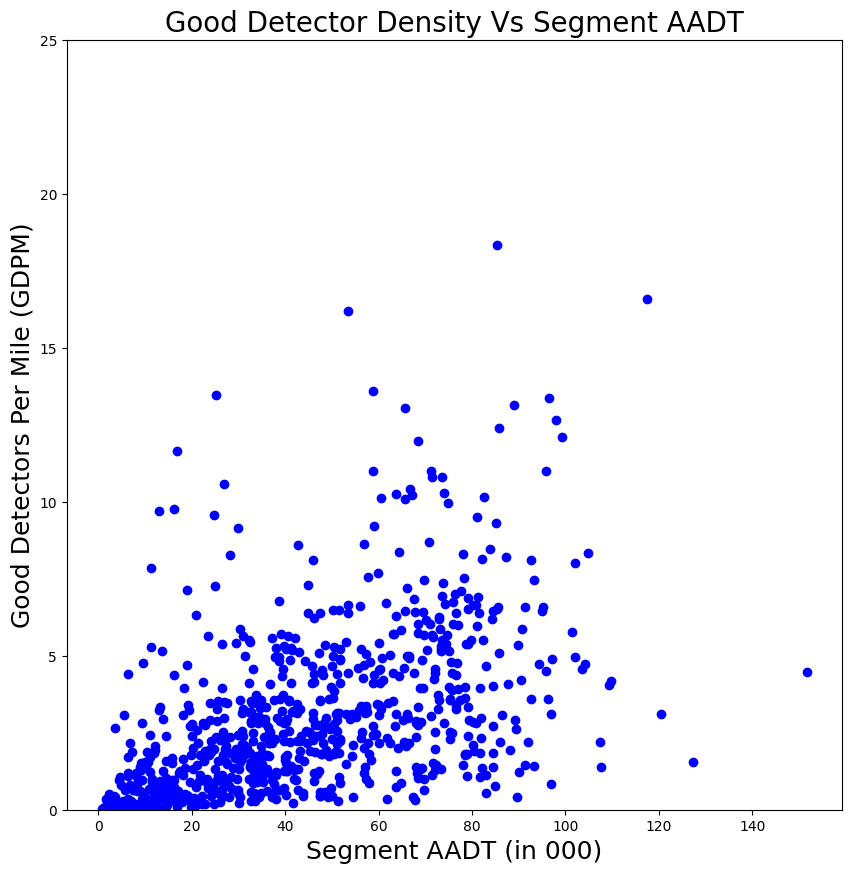

In [78]:
plt.figure(figsize=(10, 10))

# Filter the data
data = shs_link_pems_sensor_density.loc[shs_link_pems_sensor_density['Normalized_DCI'] != 0]

# Map colors to the Segment_Class column
#data_colors = data['Segment_Class'].map(colors).fillna('gray')

# Create the scatter plot with colors based on Segment_Class
plt.scatter(
    data['Segment_aadt_avg'], 
    data['Normalized_Good_Detectors_per_mile'], 
    c='blue', 
    marker='o', 
    label='Data Points'
)

# Add a horizontal line at y = 0.2
#plt.axhline(y=10, color='red', linestyle='--', linewidth=2, label='Horizontal threshold (y=0.2)')

# Add a vertical line at x = 50
#plt.axvline(x=20, color='orange', linestyle='--', linewidth=2, label='Vertical threshold (x=50)')
# Add a vertical line at x = 50
#plt.axvline(x=50, color='red', linestyle='--', linewidth=2, label='Vertical threshold (x=50)')


# Adding labels and title
plt.xlabel('Segment AADT (in 000)', fontsize=18)
plt.ylabel('Good Detectors Per Mile (GDPM)', fontsize=18)
plt.title('Good Detector Density Vs Segment AADT', fontsize=20)
plt.ylim(0, 25)
#plt.xlim(0, 100)

# Show legend
#plt.legend()

# Display the plot
plt.show()


In [79]:
summary_gdf = gpd.GeoDataFrame(shs_link_pems_sensor_density, geometry='geometry', crs="EPSG:3310")
# Transform CRS to EPSG:4326
summary_gdf_4326 = summary_gdf.to_crs("EPSG:4326")
# Save as GeoJSON
crs = {'init': 'epsg:4326'}
final_data = gpd.GeoDataFrame(summary_gdf_4326, crs=crs, geometry = 'geometry')
final_data.to_file("pems_coverage_epsg_4326_updated.json", driver="GeoJSON")

/home/jupyter/venv/arcgis_env/lib64/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


# Lets work on Shhop Minor Project

In [147]:
# read the  minor shop project
minord=gpd.read_file('/mnt/mdp/Jupyter/Dev_Mintu/PeMS_Coverage/project_data/pems_minor_shhop_project.json')
minord=minord.drop(['pems_coverage__JSONToFeature1.Route','pems_coverage__JSONToFeature1.District','pems_coverage__JSONToFeature1.County'],axis=1)
# clean the column heading name
minord.rename(columns=lambda x: x.replace('pems_coverage__JSONToFeature1.', ''), inplace=True)
minord.rename(columns=lambda x: x.replace('pems_coverage_AddSpatialJoin_1.', ''), inplace=True)
# exclude that shs that was not joined with minor project
minord=minord.loc[minord['Join_Count']==1]
# exclude the shs that does not have the sensor
minord=minord.loc[minord['DETECTOR_ID_count']!=0]
# find the Project where we have segments with high priority to fix
minord1=minord.loc[minord['Segment_Class']=='Segments With High Priority']
# drop the unnecessary columns
minord2=minord1.drop(['OBJECTID','OBJECTID', 'Join_Count','TARGET_FID', 'RecordNumber', 'DynSegPM', 'Header','BeginPostmileValue', 'EndPostmileValue',
       'DynSegRoute', 'DynSegToRoute', 'LocatingStatus', 'Shape_Length','Distance_in_ft',],axis=1)
minord3=minord2.rename(columns={'OBJECTID_1':'OBJECTID'})
minord3['Route']=minord3['Route'].astype('int64') 
minord3.head()

,OBJECTID,Direction,DETECTOR_ID_count,Segment_length_mile,Segment_aadt_avg,Normalized_good_detector,Physical_lane,Segment_lane_length_mile,detector_desity_per_lane_mile,detector_desity_per_1000_AADT,...,ID,District,County,Route,Begin_PM,End_PM,Activity_Category,Class,PMTB_Alignment,geometry
36,240.0,WB,29.0,6.933012,75.282684,17.526028,4.0344827586206895,27.97111569381311,1.036784,0.385215,...,MA001124,8,RIV,15,41,52.281,Mobility - TMS,Minor,R,"LINESTRING (-117.55836 34.02415, -117.55826 34..."
114,999.0,NB,81.0,18.902729,89.512551,49.528771,5.320987654320987,100.58118542691642,0.805320,0.904901,...,MB001574,11,SD,15,M21.61,M21.95,Pavement - Roadway Rehabilitation 3R,Minor,R,"LINESTRING (-117.11209 32.86079, -117.11146 32..."
115,1001.0,SB,79.0,18.896388,80.766851,53.301366,4.493670886075949,84.91415069299589,0.930351,0.978124,...,MB001574,11,SD,15,M21.61,M21.95,Pavement - Roadway Rehabilitation 3R,Minor,L,"LINESTRING (-117.11218 32.86082, -117.11146 32..."
123,1012.0,NB,8.0,2.974601,68.006841,7.068496,4.0,11.898403725223538,0.672359,0.117635,...,MA001170,8,RIV,15,R0.0,7.9,Mobility - TMS,Minor,R,"LINESTRING (-117.14316 33.43256, -117.14314 33..."
139,1051.0,SB,12.0,2.978641,75.320680,10.673972,4.0,11.914564416867314,1.007171,0.159319,...,MA001170,8,RIV,15,R0.0,7.9,Mobility - TMS,Minor,L,"LINESTRING (-117.1438 33.43256, -117.14275 33...."


In [148]:
minord3.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [149]:
# Lets bring corresponding Pems station
shhop_minor_project=pd.merge(detector_list,minord3,on=['OBJECTID'], how='inner')
shhop_minor_project['FREEWAY']=shhop_minor_project['FREEWAY'].astype('int64')
# now filter out more if route does not align
shhop_minor_project1 = shhop_minor_project.loc[shhop_minor_project['FREEWAY'] == shhop_minor_project['Route']]
shhop_minor_project1.head()

,OBJECTID,DETECTOR_ID,STATION_ID,STATUS,LANE,DETECTOR_TYPE,FREEWAY,DIRECTION,LATITUDE,LONGITUDE,...,ID,District,County,Route,Begin_PM,End_PM,Activity_Category,Class,PMTB_Alignment,geometry
29,999.0,1111034.0,1108767,1.0,4.0,ML,15,NB,33.067901,-117.069046,...,MB001574,11,SD,15,M21.61,M21.95,Pavement - Roadway Rehabilitation 3R,Minor,R,"LINESTRING (-117.11209 32.86079, -117.11146 32..."
30,999.0,1111032.0,1108767,1.0,2.0,ML,15,NB,33.067901,-117.069046,...,MB001574,11,SD,15,M21.61,M21.95,Pavement - Roadway Rehabilitation 3R,Minor,R,"LINESTRING (-117.11209 32.86079, -117.11146 32..."
31,999.0,1111031.0,1108767,1.0,1.0,ML,15,NB,33.067901,-117.069046,...,MB001574,11,SD,15,M21.61,M21.95,Pavement - Roadway Rehabilitation 3R,Minor,R,"LINESTRING (-117.11209 32.86079, -117.11146 32..."
32,999.0,1111033.0,1108767,1.0,3.0,ML,15,NB,33.067901,-117.069046,...,MB001574,11,SD,15,M21.61,M21.95,Pavement - Roadway Rehabilitation 3R,Minor,R,"LINESTRING (-117.11209 32.86079, -117.11146 32..."
33,999.0,1123026.0,1123029,1.0,4.0,ML,15,NB,32.985041,-117.082852,...,MB001574,11,SD,15,M21.61,M21.95,Pavement - Roadway Rehabilitation 3R,Minor,R,"LINESTRING (-117.11209 32.86079, -117.11146 32..."


In [150]:
# check if the above output makes sense or not
shhop_minor_project1.shape,minord3['DETECTOR_ID_count'].sum()

((3813, 33), 4602.0)

In [151]:
# clean the dataset before saving
shhop_minor_project1.columns

Index(['OBJECTID', 'DETECTOR_ID', 'STATION_ID', 'STATUS', 'LANE',
       'DETECTOR_TYPE', 'FREEWAY', 'DIRECTION', 'LATITUDE', 'LONGITUDE',
       'Direction', 'DETECTOR_ID_count', 'Segment_length_mile',
       'Segment_aadt_avg', 'Normalized_good_detector', 'Physical_lane',
       'Segment_lane_length_mile', 'detector_desity_per_lane_mile',
       'detector_desity_per_1000_AADT', 'DCI', 'Normalized_DCI',
       'Normalized_Good_Detectors_per_mile', 'Segment_Class', 'ID', 'District',
       'County', 'Route', 'Begin_PM', 'End_PM', 'Activity_Category', 'Class',
       'PMTB_Alignment', 'geometry'],
      dtype='object')

In [152]:
# save the minor project that can work on PeMS stations
shhop_minor_project2=shhop_minor_project1.drop(['geometry'],axis=1)
shhop_minor_project2.to_csv('Minor_project_that_can_work_on_PeMS_Station_improvement.csv')
#also save as geojson file
#summary_gdf = gpd.GeoDataFrame(shhop_minor_project1, geometry='geometry', crs="EPSG:4326")
# Transform CRS to EPSG:4326
#summary_gdf_4326 = summary_gdf.to_crs("EPSG:4326")
# Save as GeoJSON
crs = {'init': 'epsg:4326'}
mp_data = gpd.GeoDataFrame(shhop_minor_project1, crs=crs, geometry = 'geometry')
mp_data.to_file("Minor_project_that_can_work_on_PeMS_Station_improvement_epsg_4326.json", driver="GeoJSON")

/home/jupyter/venv/arcgis_env/lib64/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [153]:
mp_data.head()

,OBJECTID,DETECTOR_ID,STATION_ID,STATUS,LANE,DETECTOR_TYPE,FREEWAY,DIRECTION,LATITUDE,LONGITUDE,...,ID,District,County,Route,Begin_PM,End_PM,Activity_Category,Class,PMTB_Alignment,geometry
29,999.0,1111034.0,1108767,1.0,4.0,ML,15,NB,33.067901,-117.069046,...,MB001574,11,SD,15,M21.61,M21.95,Pavement - Roadway Rehabilitation 3R,Minor,R,"LINESTRING (-117.11209 32.86079, -117.11146 32..."
30,999.0,1111032.0,1108767,1.0,2.0,ML,15,NB,33.067901,-117.069046,...,MB001574,11,SD,15,M21.61,M21.95,Pavement - Roadway Rehabilitation 3R,Minor,R,"LINESTRING (-117.11209 32.86079, -117.11146 32..."
31,999.0,1111031.0,1108767,1.0,1.0,ML,15,NB,33.067901,-117.069046,...,MB001574,11,SD,15,M21.61,M21.95,Pavement - Roadway Rehabilitation 3R,Minor,R,"LINESTRING (-117.11209 32.86079, -117.11146 32..."
32,999.0,1111033.0,1108767,1.0,3.0,ML,15,NB,33.067901,-117.069046,...,MB001574,11,SD,15,M21.61,M21.95,Pavement - Roadway Rehabilitation 3R,Minor,R,"LINESTRING (-117.11209 32.86079, -117.11146 32..."
33,999.0,1123026.0,1123029,1.0,4.0,ML,15,NB,32.985041,-117.082852,...,MB001574,11,SD,15,M21.61,M21.95,Pavement - Roadway Rehabilitation 3R,Minor,R,"LINESTRING (-117.11209 32.86079, -117.11146 32..."


# Lets work on Shhop HM Project

In [159]:
# read the  minor shop project
hmd=gpd.read_file('/mnt/mdp/Jupyter/Dev_Mintu/PeMS_Coverage/project_data/pems_hm_raw_shhop_project.json')
hmd=hmd.drop(['pems_coverage__JSONToFeature2.Route','pems_coverage__JSONToFeature2.District','pems_coverage__JSONToFeature2.County'],axis=1)
# clean the column heading name
hmd.rename(columns=lambda x: x.replace('pems_coverage__JSONToFeature2.', ''), inplace=True)
hmd.rename(columns=lambda x: x.replace('pems_coverage_AddSpatialJoin_2.', ''), inplace=True)
# exclude that shs that was not joined with minor project
hmd=hmd.loc[hmd['Join_Count']==1]
# exclude the shs that does not have the sensor
hmd=hmd.loc[hmd['DETECTOR_ID_count']!=0]
# find the Project where we have segments with high priority to fix
hmd1=hmd.loc[hmd['Segment_Class']=='Segments With High Priority']
# drop the unnecessary columns
hmd2=hmd1.drop(['OBJECTID','OBJECTID', 'Join_Count','TARGET_FID', 'RecordNumber', 'DynSegPM', 'Header','BeginPostmileValue', 'EndPostmileValue',
       'DynSegRoute', 'DynSegToRoute', 'LocatingStatus', 'Shape_Length','Distance_in_ft',],axis=1)
hmd3=hmd2.rename(columns={'OBJECTID_1':'OBJECTID'})
hmd3['Route']=hmd3['Route'].astype('int64') 
hmd3.head()

,OBJECTID,Direction,DETECTOR_ID_count,Segment_length_mile,Segment_aadt_avg,Normalized_good_detector,Physical_lane,Segment_lane_length_mile,detector_desity_per_lane_mile,detector_desity_per_1000_AADT,...,ID,District,County,Route,Begin_PM,End_PM,Activity_Category,Class,PMTB_Alignment,geometry
32,232.0,EB,71.0,9.382691,102.012141,46.450556,3.619718309859155,33.96269802346306,2.090529,0.695996,...,HM002108,7,LA,60,R23.173,R24.78,Pavement - HM1,hm_raw,R,"LINESTRING (-117.87751 33.9951, -117.87504 33...."
34,234.0,EB,62.0,7.822590,93.363545,10.977896,4.838709677419355,37.85124410532555,1.637991,0.664071,...,HM001446,7,LA,5,12.18,R46.55,TMS - HM4,hm_raw,R,"LINESTRING (-118.21608 34.02905, -118.21458 34..."
44,280.0,SB,25.0,4.797705,107.461398,10.495988,4.28,20.534179527863014,1.217482,0.232642,...,HM002109,7,LA,71,R0.335R,R1.479,Pavement - HM1,hm_raw,R,"LINESTRING (-117.80129 34.04796, -117.80179 34..."
62,324.0,NB,30.0,4.798066,87.664468,19.586260,4.4,21.11148924602969,1.421027,0.342214,...,HM002109,7,LA,71,R0.335R,R1.479,Pavement - HM1,hm_raw,R,"LINESTRING (-117.801 34.04798, -117.80111 34.0..."
63,325.0,EB,111.0,12.424004,109.796515,51.851558,3.972972972972973,49.360233423697174,2.248774,1.010961,...,HM000687,7,LA,605,R9.3,R20.1,Pavement - HM1,hm_raw,R,"LINESTRING (-118.07911 34.03996, -118.07887 34..."


In [160]:
# Lets bring corresponding Pems station
shhop_hm_project=pd.merge(detector_list,hmd3,on=['OBJECTID'], how='inner')
shhop_hm_project['FREEWAY']=shhop_hm_project['FREEWAY'].astype('int64')
# now filter out more if route does not align
shhop_hm_project1 = shhop_hm_project.loc[shhop_hm_project['FREEWAY'] == shhop_hm_project['Route']]
shhop_hm_project1.head()

,OBJECTID,DETECTOR_ID,STATION_ID,STATUS,LANE,DETECTOR_TYPE,FREEWAY,DIRECTION,LATITUDE,LONGITUDE,...,ID,District,County,Route,Begin_PM,End_PM,Activity_Category,Class,PMTB_Alignment,geometry
0,232.0,774464.0,774475,1.0,1.0,ML,60,EB,34.025037,-117.774955,...,HM002108,7,LA,60,R23.173,R24.78,Pavement - HM1,hm_raw,R,"LINESTRING (-117.87751 33.9951, -117.87504 33...."
1,232.0,774465.0,774475,1.0,2.0,ML,60,EB,34.025037,-117.774955,...,HM002108,7,LA,60,R23.173,R24.78,Pavement - HM1,hm_raw,R,"LINESTRING (-117.87751 33.9951, -117.87504 33...."
2,232.0,774467.0,774475,1.0,4.0,ML,60,EB,34.025037,-117.774955,...,HM002108,7,LA,60,R23.173,R24.78,Pavement - HM1,hm_raw,R,"LINESTRING (-117.87751 33.9951, -117.87504 33...."
3,232.0,774466.0,774475,1.0,3.0,ML,60,EB,34.025037,-117.774955,...,HM002108,7,LA,60,R23.173,R24.78,Pavement - HM1,hm_raw,R,"LINESTRING (-117.87751 33.9951, -117.87504 33...."
4,232.0,774173.0,774182,1.0,1.0,HV,60,EB,34.002482,-117.832788,...,HM002108,7,LA,60,R23.173,R24.78,Pavement - HM1,hm_raw,R,"LINESTRING (-117.87751 33.9951, -117.87504 33...."


In [161]:
# check if the above output makes sense or not
shhop_hm_project1.shape,hmd3['DETECTOR_ID_count'].sum()

((5827, 33), 8402.0)

In [162]:
# save the minor project that can work on PeMS stations
shhop_hm_project2=shhop_hm_project1.drop(['geometry'],axis=1)
shhop_hm_project2.to_csv('HM_project_that_can_work_on_PeMS_Station_improvement.csv')
#also save as geojson file
#summary_gdf = gpd.GeoDataFrame(shhop_minor_project1, geometry='geometry', crs="EPSG:4326")
# Transform CRS to EPSG:4326
#summary_gdf_4326 = summary_gdf.to_crs("EPSG:4326")
# Save as GeoJSON
crs = {'init': 'epsg:4326'}
hm_data = gpd.GeoDataFrame(shhop_hm_project1, crs=crs, geometry = 'geometry')
hm_data.to_file("HM_project_that_can_work_on_PeMS_Station_improvement_epsg_4326.json", driver="GeoJSON")

/home/jupyter/venv/arcgis_env/lib64/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


# Lets work on Shhop Ten years Project

In [169]:
# read the  minor shop project
tyd=gpd.read_file('/mnt/mdp/Jupyter/Dev_Mintu/PeMS_Coverage/project_data/pems_ten_years_shhop_project.json')
tyd=tyd.drop(['pems_coverage__JSONToFeature.Route','pems_coverage__JSONToFeature.District','pems_coverage__JSONToFeature.County'],axis=1)
# clean the column heading name
tyd.rename(columns=lambda x: x.replace('pems_coverage__JSONToFeature.', ''), inplace=True)
tyd.rename(columns=lambda x: x.replace('pems_coverage_AddSpatialJoin.', ''), inplace=True)
# exclude that shs that was not joined with minor project
tyd=tyd.loc[tyd['Join_Count']==1]
# exclude the shs that does not have the sensor
tyd=tyd.loc[tyd['DETECTOR_ID_count']!=0]
# find the Project where we have segments with high priority to fix
tyd1=tyd.loc[tyd['Segment_Class']=='Segments With High Priority']
# drop the unnecessary columns
tyd2=tyd1.drop(['OBJECTID','OBJECTID', 'Join_Count','TARGET_FID', 'RecordNumber', 'DynSegPM', 'Header','BeginPostmileValue', 'EndPostmileValue',
       'DynSegRoute', 'DynSegToRoute', 'LocatingStatus', 'Shape_Length','Distance_in_ft',],axis=1)
tyd3=tyd2.rename(columns={'OBJECTID_1':'OBJECTID'})
tyd3['Route']=tyd3['Route'].astype('int64') 
tyd3.head()

,OBJECTID,Direction,DETECTOR_ID_count,Segment_length_mile,Segment_aadt_avg,Normalized_good_detector,Physical_lane,Segment_lane_length_mile,detector_desity_per_lane_mile,detector_desity_per_1000_AADT,...,ID,District,County,Route,Begin_PM,End_PM,Activity_Category,Class,PMTB_Alignment,geometry
6,9.0,WB,62.0,13.638434,63.468754,37.189054,3.3548387096774195,45.75474539622247,1.355051,0.976859,...,15957,4,SOL,80,15,30.7,Pavement,TenYrShopp,L,"LINESTRING (-121.94216 38.38225, -121.94191 38..."
32,232.0,EB,71.0,9.382691,102.012141,46.450556,3.619718309859155,33.96269802346306,2.090529,0.695996,...,18504,7,LA,60,R25.3,R30.45,Pavement,TenYrShopp,R,"LINESTRING (-117.87751 33.9951, -117.87504 33...."
34,234.0,EB,62.0,7.822590,93.363545,10.977896,4.838709677419355,37.85124410532555,1.637991,0.664071,...,13143,7,LA,60,R2.8,11.8,Pavement,TenYrShopp,R,"LINESTRING (-118.21608 34.02905, -118.21458 34..."
36,240.0,WB,29.0,6.933012,75.282684,17.526028,4.0344827586206895,27.97111569381311,1.036784,0.385215,...,17125,8,RIV,15,38.2,51.5,Pavement,TenYrShopp,R,"LINESTRING (-117.55836 34.02415, -117.55826 34..."
37,241.0,WB,114.0,9.954131,78.523060,18.169858,3.3947368421052633,33.79165569115851,3.373614,1.451803,...,21458,8,SBD,83,6,7.6,Pavement,TenYrShopp,R,"LINESTRING (-117.72943 34.02522, -117.72844 34..."


In [170]:
# Lets bring corresponding Pems station
shhop_ty_project=pd.merge(detector_list,tyd3,on=['OBJECTID'], how='inner')
shhop_ty_project['FREEWAY']=shhop_ty_project['FREEWAY'].astype('int64')
# now filter out more if route does not align
shhop_ty_project1 = shhop_ty_project.loc[shhop_ty_project['FREEWAY'] == shhop_ty_project['Route']]
shhop_ty_project1.head()

,OBJECTID,DETECTOR_ID,STATION_ID,STATUS,LANE,DETECTOR_TYPE,FREEWAY,DIRECTION,LATITUDE,LONGITUDE,...,ID,District,County,Route,Begin_PM,End_PM,Activity_Category,Class,PMTB_Alignment,geometry
0,9.0,438552.0,421503,1.0,5.0,ML,80,WB,38.513822,-121.776853,...,15957,4,SOL,80,15,30.7,Pavement,TenYrShopp,L,"LINESTRING (-121.94216 38.38225, -121.94191 38..."
1,9.0,438551.0,421503,1.0,4.0,ML,80,WB,38.513822,-121.776853,...,15957,4,SOL,80,15,30.7,Pavement,TenYrShopp,L,"LINESTRING (-121.94216 38.38225, -121.94191 38..."
2,9.0,438549.0,421503,1.0,2.0,ML,80,WB,38.513822,-121.776853,...,15957,4,SOL,80,15,30.7,Pavement,TenYrShopp,L,"LINESTRING (-121.94216 38.38225, -121.94191 38..."
3,9.0,438548.0,421503,1.0,1.0,ML,80,WB,38.513822,-121.776853,...,15957,4,SOL,80,15,30.7,Pavement,TenYrShopp,L,"LINESTRING (-121.94216 38.38225, -121.94191 38..."
4,9.0,438550.0,421503,1.0,3.0,ML,80,WB,38.513822,-121.776853,...,15957,4,SOL,80,15,30.7,Pavement,TenYrShopp,L,"LINESTRING (-121.94216 38.38225, -121.94191 38..."


In [171]:
# check if the above output makes sense or not
shhop_ty_project1.shape,tyd3['DETECTOR_ID_count'].sum()

((4971, 33), 9042.0)

In [172]:
# save the minor project that can work on PeMS stations
shhop_ty_project2=shhop_ty_project1.drop(['geometry'],axis=1)
shhop_ty_project2.to_csv('Ten_years_project_that_can_work_on_PeMS_Station_improvement.csv')
#also save as geojson file
#summary_gdf = gpd.GeoDataFrame(shhop_minor_project1, geometry='geometry', crs="EPSG:4326")
# Transform CRS to EPSG:4326
#summary_gdf_4326 = summary_gdf.to_crs("EPSG:4326")
# Save as GeoJSON
crs = {'init': 'epsg:4326'}
ty_data = gpd.GeoDataFrame(shhop_ty_project1, crs=crs, geometry = 'geometry')
ty_data.to_file("Ten_years_project_that_can_work_on_PeMS_Station_improvement_epsg_4326.json", driver="GeoJSON")

/home/jupyter/venv/arcgis_env/lib64/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


# end of the Script